In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data=pd.read_csv(r"walmart_stock_prices.csv")

In [3]:
data.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0


In [4]:
data.tail(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
13230,2025-02-19 00:00:00-05:00,103.849998,104.199997,102.550003,104.000000,18508000,0.0,0.0
13231,2025-02-20 00:00:00-05:00,98.779999,100.120003,96.680000,97.209999,55450900,0.0,0.0
13232,2025-02-21 00:00:00-05:00,96.529999,96.849998,94.120003,94.779999,34972500,0.0,0.0


In [5]:
data.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [6]:
print(data.dtypes)


Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


In [7]:
# Date sütununu datetime formatına çevirme
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', utc=True)  # utc=True ekledik

# Date sütununun datetime formatında olup olmadığını kontrol etme
print(data['Date'].dtype)

# Zaman dilimi bilgisi eklemeye artık gerek yok, çünkü utc=True ile belirledik.

# Date sütununu timestamp (saniye) olarak sayıya çevirme
data['Date_numeric'] = data['Date'].astype('int64') // 10**9

print(data)



datetime64[ns, UTC]
                           Date        Open        High         Low  \
0     1972-08-25 04:00:00+00:00    0.011463    0.011683    0.011463   
1     1972-08-28 04:00:00+00:00    0.011639    0.011727    0.011595   
2     1972-08-29 04:00:00+00:00    0.011551    0.011551    0.011463   
3     1972-08-30 04:00:00+00:00    0.011463    0.011463    0.011374   
4     1972-08-31 04:00:00+00:00    0.011374    0.011374    0.011286   
...                         ...         ...         ...         ...   
13228 2025-02-14 05:00:00+00:00  105.300003  105.300003  103.599998   
13229 2025-02-18 05:00:00+00:00  103.720001  103.989998  102.510002   
13230 2025-02-19 05:00:00+00:00  103.849998  104.199997  102.550003   
13231 2025-02-20 05:00:00+00:00   98.779999  100.120003   96.680000   
13232 2025-02-21 05:00:00+00:00   96.529999   96.849998   94.120003   

            Close    Volume  Dividends  Stock Splits  Date_numeric  
0        0.011639   7526400        0.0           0.0      

<Axes: xlabel='Open', ylabel='Close'>

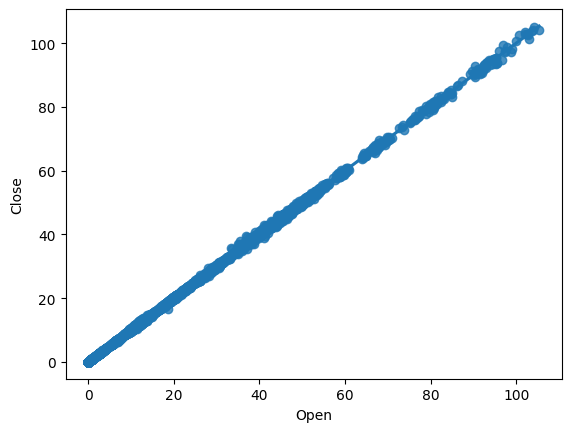

In [8]:
sns.regplot(data,x='Open',y='Close')
#Good Performance: If the opening price is higher, investors might continue trading the stock at higher prices as the day progresses,
#  which can push the closing price higher.

In [9]:
corr_data=data[["Open","Close"]]
corr=corr_data.corr()
print(f"the corelation is {corr}")#that's the proof


the corelation is            Open     Close
Open   1.000000  0.999911
Close  0.999911  1.000000


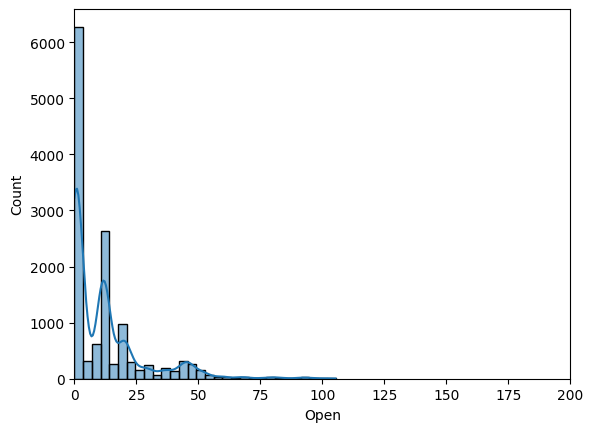

In [10]:
sns.histplot(data=data, x='Open', bins=30,kde=True)
plt.xlim(0, 200)  # Adjust the x-axis range to zoom in
plt.show()


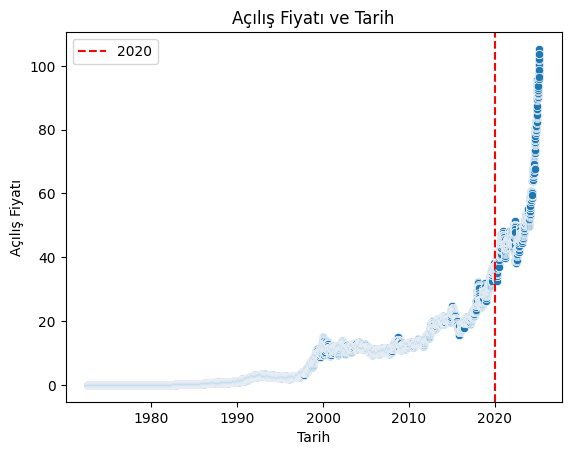

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Date' sütununun datetime formatında olduğundan emin olun
data['Date'] = pd.to_datetime(data['Date'])

# 'Open' ile 'Date' arasındaki scatter plot'u oluşturma
sns.scatterplot(data=data, x='Date', y='Open')

# İsteğe bağlı olarak, 2020'yi işaretlemek için bir dikey çizgi ekleyebilirsiniz
plt.axvline(pd.to_datetime('2020-01-01'), color='red', linestyle='--', label='2020')

# Etiketler ve başlık ekleme
plt.xlabel('Tarih')
plt.ylabel('Açılış Fiyatı')
plt.title('Açılış Fiyatı ve Tarih')

# Legendi gösterme
plt.legend()

# Grafik gösterme
plt.show()


In [12]:

#"Due to the impact of the pandemic, opening prices remained stable, but a rapid upward trend was observed afterward."

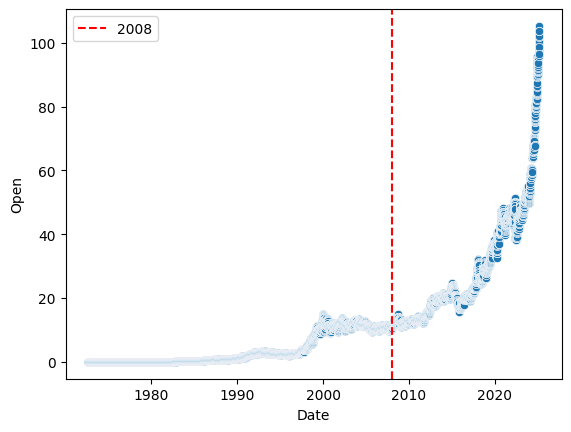

In [13]:
sns.scatterplot(data,x='Date',y='Open')
plt.axvline(pd.to_datetime('2008-01-01'), color='red', linestyle='--', label='2008')
plt.legend()
plt.show()

In [14]:
# Zaman dilimini UTC'ye çevirelim (zaten zaman dilimli bir veri var)
data['Date'] = data['Date'].dt.tz_convert('UTC')

# 2008 krizinin tarihlerini de UTC olarak belirleyelim
crisis_start = pd.to_datetime('2008-01-01').tz_localize('UTC')
crisis_end = pd.to_datetime('2009-01-01').tz_localize('UTC')

# Kriz öncesi ve sonrası verileri ayıralım
pre_crisis = data[data['Date'] < crisis_start]
post_crisis = data[data['Date'] > crisis_end]

# Ortalama fiyatları karşılaştıralım
pre_crisis_avg = pre_crisis['Open'].mean()  
post_crisis_avg = post_crisis['Open'].mean()

print(f"Pre-Crisis Average: {pre_crisis_avg}")
print(f"Post-Crisis Average: {post_crisis_avg}")




Pre-Crisis Average: 3.7297264173335005
Post-Crisis Average: 29.928877672391028


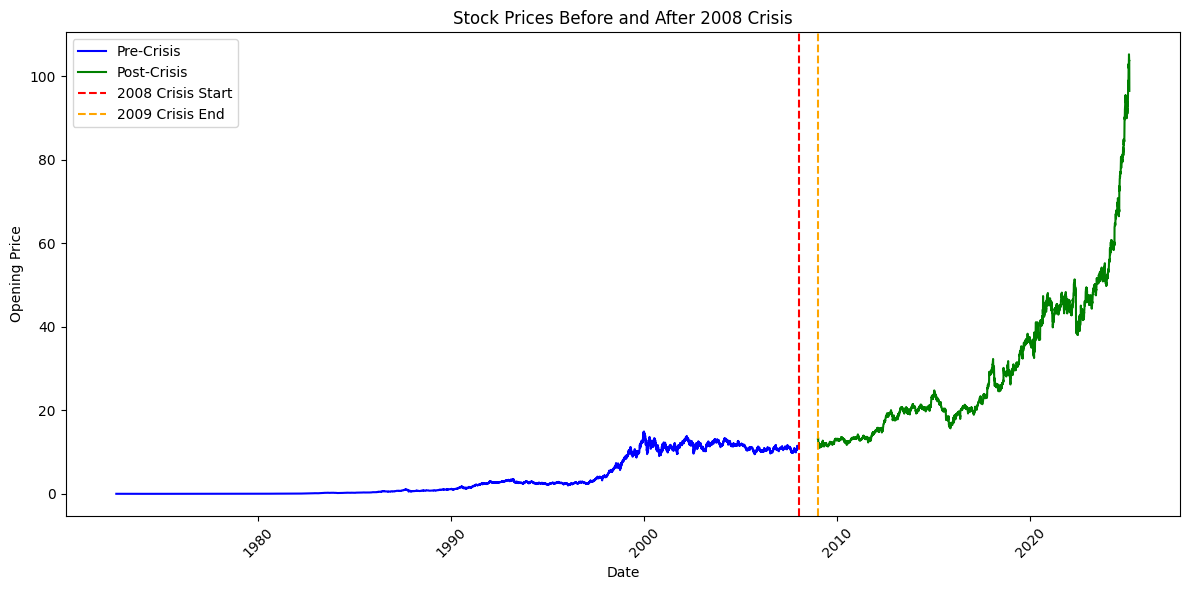

In [15]:
# Veriyi görselleştirelim
plt.figure(figsize=(12, 6))

# Kriz öncesi ve sonrası fiyatları çizelim
sns.lineplot(data=pre_crisis, x='Date', y='Open', label='Pre-Crisis', color='blue')
sns.lineplot(data=post_crisis, x='Date', y='Open', label='Post-Crisis', color='green')

# Kriz başlangıç ve bitişini işaretleyelim
plt.axvline(crisis_start, color='red', linestyle='--', label='2008 Crisis Start')
plt.axvline(crisis_end, color='orange', linestyle='--', label='2009 Crisis End')

# Grafik başlığı ve etiketler
plt.title('Stock Prices Before and After 2008 Crisis')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.legend()

# Grafik gösterimi
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
"""Stable Prices: If the opening prices were largely unaffected after the 2008 crisis, it would be useful to investigate the reasons. For instance,
the company's financial health could have been good during the crisis, or demand in the
industry may have stabilized, keeping the stock prices steady.
Sector-Specific Responses: Sometimes, the crisis affects some sectors more than others, 
or certain sectors can recover quickly. For instance, technology companies or consumer staples might have been less affected.
"""

"Stable Prices: If the opening prices were largely unaffected after the 2008 crisis, it would be useful to investigate the reasons. For instance,\nthe company's financial health could have been good during the crisis, or demand in the\nindustry may have stabilized, keeping the stock prices steady.\nSector-Specific Responses: Sometimes, the crisis affects some sectors more than others, \nor certain sectors can recover quickly. For instance, technology companies or consumer staples might have been less affected.\n"

<Axes: xlabel='High', ylabel='Low'>

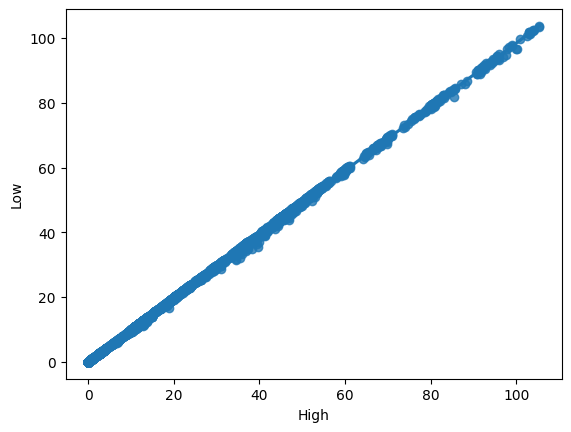

In [17]:
sns.regplot(data,x='High',y='Low')

In [18]:
corr_data=data[["Low","High"]]
corr=corr_data.corr()
print(f"the  corelation is {corr}")
#This result might be expected when looking at data like stock prices because "Low" and "High" values are generally close to each other
# and the difference between them is usually small. In this case, both tend to move in a similar manner.

the  corelation is            Low      High
Low   1.000000  0.999936
High  0.999936  1.000000


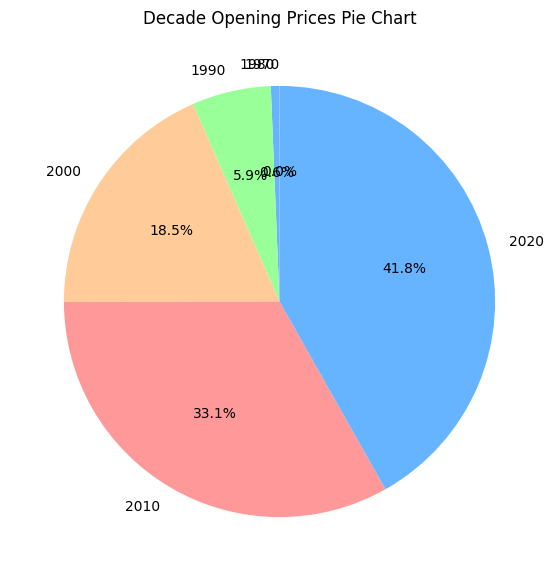

In [19]:

# Decade sütununu oluşturma ve decade_opening verisini oluşturma
data["Decade"] = (data["Date"].dt.year // 10) * 10
decade_opening = data.groupby("Decade")["Open"].sum().reset_index()

# Pie grafiği için verileri alalım
labels = decade_opening["Decade"]  # Etiketler Decade olacak
sizes = decade_opening["Open"]    # Boyutlar ise açılış fiyatlarının toplamı olacak

# Pie grafiği oluşturma
plt.figure(figsize=(7, 7))  # Grafik boyutunu ayarlayabilirsiniz
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Grafik başlığı
plt.title('Decade Opening Prices Pie Chart')

# Grafiği gösterme
plt.show()


In [20]:
"""
One of the reasons for the significant increase in economic growth after the 2000s could be the rapid integration of the internet into our lives. The internet has had a major impact on the global economy, leading to revolutionary changes in many sectors. During this period, factors such as the widespread adoption of the internet,
 the acceleration of digitalization,
   and the emergence of new business models have significantly accelerated economic growth.
"""

'\nOne of the reasons for the significant increase in economic growth after the 2000s could be the rapid integration of the internet into our lives. The internet has had a major impact on the global economy, leading to revolutionary changes in many sectors. During this period, factors such as the widespread adoption of the internet,\n the acceleration of digitalization,\n   and the emergence of new business models have significantly accelerated economic growth.\n'

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Gereksiz sütunları düşürüyoruz
x = data.drop(columns=['Date', 'Close', 'Date_numeric', 'Decade'])

# Hedef değişkeni tanımlıyoruz
y = data["Close"]

# Veriyi eğitim ve test setlerine ayırıyoruz
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.7)

# Linear Regression modelini başlatıyoruz
lm = LinearRegression()

# Modeli eğitim verileriyle eğitiyoruz
lm.fit(x_train, y_train)

# Test verileriyle modelin başarısını ölçüyoruz
score = lm.score(x_test, y_test)

print(f"Model R^2 skoru: {score}")



Model R^2 skoru: 0.9999655107465782


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, x, y, cv=5)  # 5 katmanlı çapraz doğrulama
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")


Cross-validation scores: [0.95780135 0.9997946  0.99965604 0.99957831 0.99987805]
Mean cross-validation score: 0.9913416713544361


In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Evaluate the model
score = rf.score(x_test, y_test)



In [24]:
import xgboost as xgb
xgb_test=xgb.XGBRFRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xgb_test.fit(x_train,y_train)
predict=xgb_test.predict(x_test)
print(predict)

[14.377426 12.303591 12.464087 ... 12.929711 11.69922  11.888919]


In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Veriyi hazırlama
x = data.drop(columns=['Date', 'Close', 'Date_numeric', 'Decade'])
y = data['Close']

# Veriyi eğitim ve test olarak ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# XGBoost regresyon modeli oluşturma
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Modeli eğitme
xg_reg.fit(x_train, y_train)

# Test verisinde tahmin yapma
y_pred = xg_reg.predict(x_test)

# Sonuçları değerlendirme
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 70.82756422542067


<Axes: xlabel='Date', ylabel='Open'>

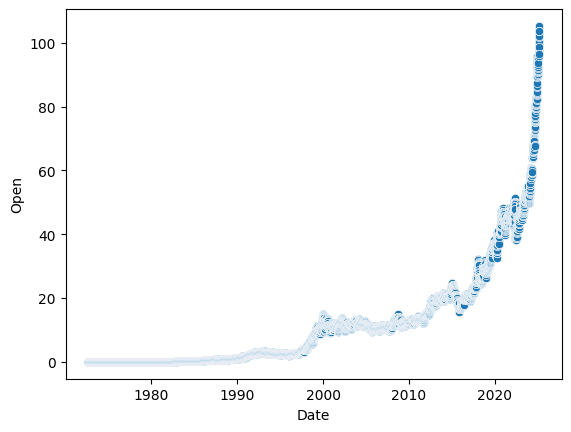

In [26]:
sns.scatterplot(data,x='Date',y='Open')

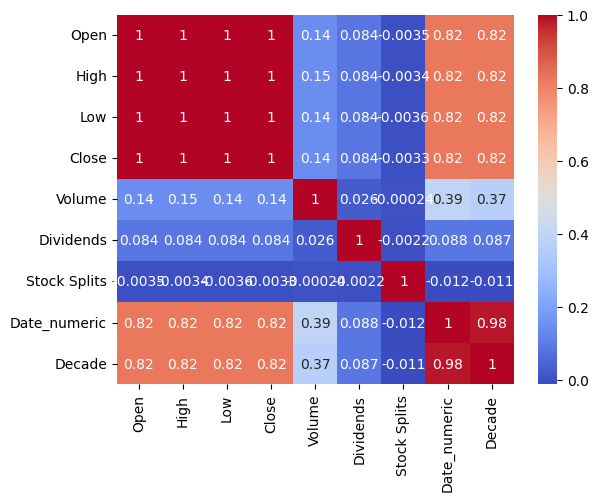

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece sayısal sütunları seç
numeric_data = data.select_dtypes(include=["number"])  # Sayısal sütunları filtrele
corr_matrix = numeric_data.corr()  # Korelasyon matrisini hesapla

# Isı haritasını çiz
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [28]:
col=["Volume","Open","High","Close","Low"]
x=data[col]
y=data["Close"]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Veri setini ayır
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=17, test_size=0.7)

# Özellikler (x) için ölçeklendirme
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Hedef değişken (y) için ölçeklendirme
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1))

# Modeli oluştur
ann = tf.keras.models.Sequential()

# Gizli katmanlar
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

# Çıkış katmanı
ann.add(tf.keras.layers.Dense(units=1, activation="linear"))  # 'linear' aktivasyon kullan

# Modeli derle
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Modeli eğit
ann.fit(x_train, y_train_scaled, batch_size=32, epochs=100)

# Test verisiyle tahmin yap
y_pred = ann.predict(x_test)

# Eğer y_pred ölçeklendiyse geri dönüştür
y_pred = sc_y.inverse_transform(y_pred)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3344 - mean_absolute_error: 0.7171
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6242 - mean_absolute_error: 0.4565
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1576 - mean_absolute_error: 0.2442
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0322 - mean_absolute_error: 0.1319
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 - mean_absolute_error: 0.0739
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - mean_absolute_error: 0.0420
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - mean_absolute_error: 0.0288
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - mean_absolute_error: 0.0203  
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4710e-04 - mean_absolute_error: 0.0161
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0502e-04 - mean_absolute_error: 0.0143
Epoch 11/

In [30]:
import pandas as pd
sc=StandardScaler()


from sklearn.preprocessing import StandardScaler

# StandardScaler nesnesini oluştur
sc = StandardScaler()

# Eğer y_train bir Series ise, reshape (-1,1) yaparak 2D hale getir
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# StandardScaler'ı fit et
sc.fit(y_train_reshaped)

# Test verisini dönüştür
y_test_scaled = sc.transform(y_test_reshaped)




# Gerçek fiyatlar ve tahmin edilen fiyatlar arasındaki korelasyonu hesapla
df = pd.DataFrame({'Gerçek Fiyat': sc_y.inverse_transform(y_test_scaled).flatten(),
                   'Tahmin Edilen Fiyat': y_pred.flatten()})

# Korelasyonu hesapla
correlation = df.corr()

print("Korelasyon Matrisi:")
print(correlation)

Korelasyon Matrisi:
                     Gerçek Fiyat  Tahmin Edilen Fiyat
Gerçek Fiyat             1.000000             0.999994
Tahmin Edilen Fiyat      0.999994             1.000000
